In [6]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

In [7]:
def fitExponential(xvals,yvals):
    
    ylog = np.log(yvals)
    l = lr()
    l.fit(xvals.reshape(-1,1), ylog)
    k = np.exp(l.intercept_)
    alpha = l.coef_
        
    return k,alpha

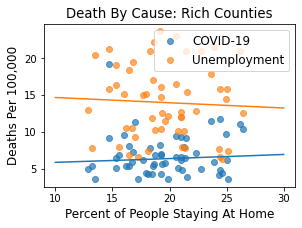

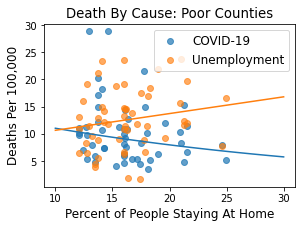

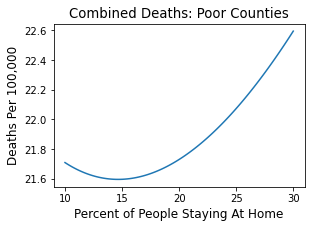

In [8]:
#need to do three things:

df = pd.read_csv('CountyLevelDataApril21.csv')

#let's do linear regression to get regression lines for deaths from unemployment:

dfpoor = df[df['Income']<60000]
dfrich = df[df['Income']>90000]



poor_mobility = dfpoor['residential_percent_change_from_baseline'].values
rich_mobility = dfrich['residential_percent_change_from_baseline'].values

poor_unemployment_deaths= dfpoor['Projected Deaths From Unemployment'].values
rich_unemployment_deaths= dfrich['Projected Deaths From Unemployment'].values

lpoor = lr()
lpoor.fit(poor_mobility.reshape(-1,1),poor_unemployment_deaths)


xvalspoor = np.linspace(10,30,100)
yvals_poor_unemployment = xvalspoor*lpoor.coef_ +lpoor.intercept_


lrich = lr()
lrich.fit(rich_mobility.reshape(-1,1),rich_unemployment_deaths)


xvalsrich = np.linspace(10,30,100)
yvals_rich_unemployment = xvalsrich*lrich.coef_ +lrich.intercept_


#now let's fit the exponential functions.


poor_covid_deaths= dfpoor['Covid Death Rate (Delayed After Lockdown)'].values
rich_covid_deaths= dfrich['Covid Death Rate (Delayed After Lockdown)'].values


k_poor,alpha_poor = fitExponential(poor_mobility,poor_covid_deaths)

yvals_poor_covid = k_poor*np.exp(alpha_poor*xvalspoor)


k_rich,alpha_rich = fitExponential(rich_mobility,rich_covid_deaths)

yvals_rich_covid = k_rich*np.exp(alpha_rich*xvalsrich)



##########Plot settings determined here:


plt.figure(figsize = (4.5,3))
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1]*.4, label = 'Covid-19 Deaths', alpha = .7)
plt.scatter(rich_mobility,rich_covid_deaths, label = 'COVID-19', alpha = .7)


plt.scatter(rich_mobility, rich_unemployment_deaths, label = 'Unemployment', alpha = .65)
# plt.scatter(poorMobility, poorUnemployment*1.3, label = 'Deaths From Unemployment: Poor', alpha = .65)
# plt.plot(xvals,yvals*.4)
plt.plot(xvalsrich,yvals_rich_covid)
plt.plot(xvalsrich,yvals_rich_unemployment)
# plt.plot(xvalsPoor,yvalsPoor)
plt.legend(prop={'size': 12},loc = "upper right")
plt.ylabel('Deaths Per 100,000',fontsize=12)
plt.title('Death By Cause: Rich Counties',fontsize=13.2)
plt.xlabel('Percent of People Staying At Home',fontsize=12)
# plt.savefig('SuperImposeCovidRich3.pdf', bbox_inches ='tight')
plt.show()



plt.figure(figsize = (4.5,3))
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1]*.4, label = 'Covid-19 Deaths', alpha = .7)
plt.scatter(poor_mobility,poor_covid_deaths, label = 'COVID-19', alpha = .7)


plt.scatter(poor_mobility, poor_unemployment_deaths, label = 'Unemployment', alpha = .65)
# plt.scatter(poorMobility, poorUnemployment*1.3, label = 'Deaths From Unemployment: Poor', alpha = .65)
# plt.plot(xvals,yvals*.4)
plt.plot(xvalspoor,yvals_poor_covid)
plt.plot(xvalspoor,yvals_poor_unemployment)
# plt.plot(xvalsPoor,yvalsPoor)
plt.legend(prop={'size': 12},loc = "upper right")
plt.ylabel('Deaths Per 100,000',fontsize=12)
plt.title('Death By Cause: Poor Counties',fontsize=13.2)
plt.xlabel('Percent of People Staying At Home',fontsize=12)
# plt.savefig('SuperImposeCovidRich3.pdf', bbox_inches ='tight')
plt.show()



plt.figure(figsize = (4.5,3))
plt.title('Combined Deaths: Poor Counties',fontsize=13.2)
plt.plot(xvalspoor,yvals_poor_covid+yvals_poor_unemployment)
plt.xlabel('Percent of People Staying At Home',fontsize=12)
plt.ylabel('Deaths Per 100,000',fontsize=12)
# plt.savefig('CombinedDeaths3.pdf',bbox_inches='tight')
plt.show()


